In [1]:
import json
import numpy as np
!pip install datasets
from datasets import load_dataset
from datasets import Dataset
import argparse
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import load_dataset
import pickle 
import numpy as np
import json
import random
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline
from pandas.core.frame import DataFrame
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=72f758ee32f6fe6957d2d3d244f478b2c6b3d72e54528dff631ff53b49eb9fa9
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers
Mounted at /content/drive


In [2]:
#read the data
dataset = load_dataset('trec')
train_dataset = dataset['train']
# get a view of data sample
train_dataset[1]

Generating train split:   0%|          | 0/5452 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

Dataset trec downloaded and prepared to /root/.cache/huggingface/datasets/trec/default/2.0.0/f2469cab1b5fceec7249fda55360dfdbd92a7a5b545e91ea0f78ad108ffac1c2. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

{'text': 'What films featured the character Popeye Doyle ?',
 'coarse_label': 1,
 'fine_label': 5}

In [3]:
train_labels = []
gt = {0: [],
      1: [],
      2: [],
      3: [],
      4: [],
      5: []}
for i in range(len(train_dataset)):
    label = train_dataset[i]['coarse_label']
    train_labels.append(label)
    gt[label].append(i)

In [4]:
# index in embedding dataset corresponds to the index in original dataset
# get sentence embedding with pretrained model
model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_train = np.zeros((5452, 384))
for i in range(len(train_dataset)):
    emb = model.encode(train_dataset[i]['text'])
    embedding_train[i] = emb

In [5]:
kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(embedding_train)

In [6]:
train_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(embedding_train)

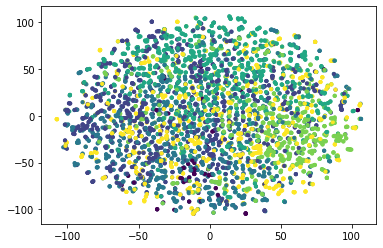

In [7]:
# visualize the clustering
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_labels, s=10)

In [8]:
#print variance of each cluster
for i in range(6):
  var = np.var(kmeans==i)
  print("clutser %s variance is : " %i,var)
  print("clutser %s amounts is : " %i,len(np.where(kmeans == i)[0]))

clutser 0 variance is :  0.15391364588385317
clutser 0 amounts is :  1036
clutser 1 variance is :  0.16116276431569262
clutser 1 amounts is :  1101
clutser 2 variance is :  0.10792686684943069
clutser 2 amounts is :  671
clutser 3 variance is :  0.1250743162901308
clutser 3 amounts is :  799
clutser 4 variance is :  0.16159957858054474
clutser 4 amounts is :  1105
clutser 5 variance is :  0.11730737244512102
clutser 5 amounts is :  740


In [9]:
#each cluster convert to df
train_dataset_df = DataFrame(train_dataset)
train_cluster_0 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 0)[0])]
train_cluster_1 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 1)[0])]
train_cluster_2 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 2)[0])]
train_cluster_3 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 3)[0])]
train_cluster_4 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 4)[0])]
train_cluster_5 = train_dataset_df[train_dataset_df.index.isin(np.where(kmeans == 5)[0])]
train_cluster_0.to_pickle('cluster_0.pkl')
train_cluster_1.to_pickle('cluster_1.pkl')
train_cluster_2.to_pickle('cluster_2.pkl')
train_cluster_3.to_pickle('cluster_3.pkl')
train_cluster_4.to_pickle('cluster_4.pkl')
train_cluster_5.to_pickle('cluster_5.pkl')

Easy augmentation method implementation

In [10]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [13]:
def gen_trec(train_orig, alpha_sr, alpha_ri, alpha_rs, alpha_rd, filename, num_aug=9):
    items = []
    
    for v in train_orig:
        label = v["coarse_label"]
        sentence = v["text"]
        aug_sentences = eda(sentence, alpha_sr=alpha_sr, alpha_ri=alpha_ri, alpha_rs=alpha_rs, p_rd=alpha_rd, num_aug=num_aug)
        item = {}
        item["label"] = label
        item["sentence"] = sentence
        item["sr"] = aug_sentences[0]
        item["ri"] = aug_sentences[1]
        item["rs"] = aug_sentences[2]
        item["rd"] = aug_sentences[3]
        items.append(item)
    with open(filename, "w") as f:
        json.dump(items, f, sort_keys=False, indent=4, separators=(',', ': '), cls=NpEncoder)

In [15]:
import random
from random import shuffle
random.seed(1)

#stop words list
stop_words = stopwords.words('english')

#preprocessing text
import re
def get_only_chars(line):

    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    # clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    # if clean_line[0] == ' ':
    #     clean_line = clean_line[1:]
    return clean_line

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

from nltk.corpus import wordnet 

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):

	#obviously, if there's only one word, don't delete it
	if len(words) == 1:
		return words

	#randomly delete words with probability p
	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	#if you end up deleting all words, just return a random word
	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)
	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0
	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words
	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################

def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)
	return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		random_word = new_words[random.randint(0, len(new_words)-1)]
		synonyms = get_synonyms(random_word)
		counter += 1
		if counter >= 10:
			return
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

########################################################################
# main data augmentation function
########################################################################

def eda(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	
	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word != '']
	num_words = len(words)
	
	augmented_sentences = []
	num_new_per_technique = int(num_aug/4)

	#sr
	if (alpha_sr > 0):
		n_sr = max(1, int(alpha_sr*num_words))
		for _ in range(num_new_per_technique):
			a_words = synonym_replacement(words, n_sr)
			augmented_sentences.append(' '.join(a_words))

	#ri
	if (alpha_ri > 0):
		n_ri = max(1, int(alpha_ri*num_words))
		for _ in range(num_new_per_technique):
			a_words = random_insertion(words, n_ri)
			augmented_sentences.append(' '.join(a_words))			

	#rs
	if (alpha_rs > 0):
		n_rs = max(1, int(alpha_rs*num_words))
		for _ in range(num_new_per_technique):
			a_words = random_swap(words, n_rs)
			augmented_sentences.append(' '.join(a_words))

	#rd
	if (p_rd > 0):
		for _ in range(num_new_per_technique):
			a_words = random_deletion(words, p_rd)
			augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	# shuffle(augmented_sentences)

	#trim so that we have the desired number of augmented sentences
	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	#append the original sentence
	# augmented_sentences.append(sentence)

	return augmented_sentences

In [18]:
#cluster 0
train_cluster_0 = pd.read_pickle('/content/drive/MyDrive/cluster_0.pkl')
train_cluster_0 = Dataset(pa.Table.from_pandas(train_cluster_0))
gen_trec(train_cluster_0,0.1, 0.1, 0.1, 0.1,'eda_0.json')

cluster_0_aug = pd.read_json('eda_0.json')
cluster_0_aug.drop(['sentence'],axis=1)

sr = cluster_0_aug['sr']
dict_sr = {"text":sr.values}
df_sr = pd.DataFrame(dict_sr)
label = cluster_0_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_sr_label = pd.concat([df_label,df_sr],axis=1)
order = ['text','coarse_label']
df_sr_label[order]
df_sr_label.to_pickle("sr_0.pkl")

ri = cluster_0_aug['ri']
dict_ri = {"text":ri.values}
df_ri = pd.DataFrame(dict_ri)
label = cluster_0_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_ri_label = pd.concat([df_label,df_ri],axis=1)
order = ['text','coarse_label']
df_ri_label[order]
df_ri_label.to_pickle("ri_0.pkl")

rs = cluster_0_aug['rs']
dict_rs = {"text":rs.values}
df_rs = pd.DataFrame(dict_rs)
label = cluster_0_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rs_label = pd.concat([df_label,df_rs],axis=1)
order = ['text','coarse_label']
df_rs_label[order]
df_rs_label.to_pickle("rs_0.pkl")

rd = cluster_0_aug['rd']
dict_rd = {"text":rd.values}
df_rd = pd.DataFrame(dict_rd)
label = cluster_0_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rd_label = pd.concat([df_label,df_rd],axis=1)
order = ['text','coarse_label']
df_rd_label[order]
df_rd_label.to_pickle("rd_0.pkl")

#cluster 1
train_cluster_1 = pd.read_pickle('/content/drive/MyDrive/cluster_1.pkl')
train_cluster_1 = Dataset(pa.Table.from_pandas(train_cluster_1))
gen_trec(train_cluster_1,0.1, 0.1, 0.1, 0.1,'eda_1.json')

cluster_1_aug = pd.read_json('eda_1.json')
cluster_1_aug.drop(['sentence'],axis=1)

sr = cluster_1_aug['sr']
dict_sr = {"text":sr.values}
df_sr = pd.DataFrame(dict_sr)
label = cluster_1_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_sr_label = pd.concat([df_label,df_sr],axis=1)
order = ['text','coarse_label']
df_sr_label[order]
df_sr_label.to_pickle("sr_1.pkl")

ri = cluster_1_aug['ri']
dict_ri = {"text":ri.values}
df_ri = pd.DataFrame(dict_ri)
label = cluster_1_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_ri_label = pd.concat([df_label,df_ri],axis=1)
order = ['text','coarse_label']
df_ri_label[order]
df_ri_label.to_pickle("ri_1.pkl")

rs = cluster_1_aug['rs']
dict_rs = {"text":rs.values}
df_rs = pd.DataFrame(dict_rs)
label = cluster_1_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rs_label = pd.concat([df_label,df_rs],axis=1)
order = ['text','coarse_label']
df_rs_label[order]
df_rs_label.to_pickle("rs_1.pkl")

rd = cluster_1_aug['rd']
dict_rd = {"text":rd.values}
df_rd = pd.DataFrame(dict_rd)
label = cluster_1_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rd_label = pd.concat([df_label,df_rd],axis=1)
order = ['text','coarse_label']
df_rd_label[order]
df_rd_label.to_pickle("rd_1.pkl")

#cluster 2
train_cluster_2 = pd.read_pickle('/content/drive/MyDrive/cluster_2.pkl')
train_cluster_2 = Dataset(pa.Table.from_pandas(train_cluster_2))
gen_trec(train_cluster_2,0.1, 0.1, 0.1, 0.1,'eda_2.json')

cluster_2_aug = pd.read_json('eda_2.json')
cluster_2_aug.drop(['sentence'],axis=1)

sr = cluster_2_aug['sr']
dict_sr = {"text":sr.values}
df_sr = pd.DataFrame(dict_sr)
label = cluster_2_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_sr_label = pd.concat([df_label,df_sr],axis=1)
order = ['text','coarse_label']
df_sr_label[order]
df_sr_label.to_pickle("sr_2.pkl")

ri = cluster_2_aug['ri']
dict_ri = {"text":ri.values}
df_ri = pd.DataFrame(dict_ri)
label = cluster_2_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_ri_label = pd.concat([df_label,df_ri],axis=1)
order = ['text','coarse_label']
df_ri_label[order]
df_ri_label.to_pickle("ri_2.pkl")

rs = cluster_2_aug['rs']
dict_rs = {"text":rs.values}
df_rs = pd.DataFrame(dict_rs)
label = cluster_2_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rs_label = pd.concat([df_label,df_rs],axis=1)
order = ['text','coarse_label']
df_rs_label[order]
df_rs_label.to_pickle("rs_2.pkl")

rd = cluster_2_aug['rd']
dict_rd = {"text":rd.values}
df_rd = pd.DataFrame(dict_rd)
label = cluster_2_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rd_label = pd.concat([df_label,df_rd],axis=1)
order = ['text','coarse_label']
df_rd_label[order]
df_rd_label.to_pickle("rd_2.pkl")

#cluster 3
train_cluster_3 = pd.read_pickle('/content/drive/MyDrive/cluster_3.pkl')
train_cluster_3 = Dataset(pa.Table.from_pandas(train_cluster_3))
gen_trec(train_cluster_3,0.1, 0.1, 0.1, 0.1,'eda_3.json')

cluster_3_aug = pd.read_json('eda_3.json')
cluster_3_aug.drop(['sentence'],axis=1)

sr = cluster_3_aug['sr']
dict_sr = {"text":sr.values}
df_sr = pd.DataFrame(dict_sr)
label = cluster_3_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_sr_label = pd.concat([df_label,df_sr],axis=1)
order = ['text','coarse_label']
df_sr_label[order]
df_sr_label.to_pickle("sr_3.pkl")

ri = cluster_3_aug['ri']
dict_ri = {"text":ri.values}
df_ri = pd.DataFrame(dict_ri)
label = cluster_3_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_ri_label = pd.concat([df_label,df_ri],axis=1)
order = ['text','coarse_label']
df_ri_label[order]
df_ri_label.to_pickle("ri_3.pkl")

rs = cluster_3_aug['rs']
dict_rs = {"text":rs.values}
df_rs = pd.DataFrame(dict_rs)
label = cluster_3_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rs_label = pd.concat([df_label,df_rs],axis=1)
order = ['text','coarse_label']
df_rs_label[order]
df_rs_label.to_pickle("rs_3.pkl")

rd = cluster_3_aug['rd']
dict_rd = {"text":rd.values}
df_rd = pd.DataFrame(dict_rd)
label = cluster_3_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rd_label = pd.concat([df_label,df_rd],axis=1)
order = ['text','coarse_label']
df_rd_label[order]
df_rd_label.to_pickle("rd_3.pkl")

#cluster 4
train_cluster_4 = pd.read_pickle('/content/drive/MyDrive/cluster_4.pkl')
train_cluster_4 = Dataset(pa.Table.from_pandas(train_cluster_4))
gen_trec(train_cluster_4,0.1, 0.1, 0.1, 0.1,'eda_4.json')

cluster_4_aug = pd.read_json('eda_4.json')
cluster_4_aug.drop(['sentence'],axis=1)

sr = cluster_4_aug['sr']
dict_sr = {"text":sr.values}
df_sr = pd.DataFrame(dict_sr)
label = cluster_4_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_sr_label = pd.concat([df_label,df_sr],axis=1)
order = ['text','coarse_label']
df_sr_label[order]
df_sr_label.to_pickle("sr_4.pkl")

ri = cluster_4_aug['ri']
dict_ri = {"text":ri.values}
df_ri = pd.DataFrame(dict_ri)
label = cluster_4_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_ri_label = pd.concat([df_label,df_ri],axis=1)
order = ['text','coarse_label']
df_ri_label[order]
df_ri_label.to_pickle("ri_4.pkl")

rs = cluster_4_aug['rs']
dict_rs = {"text":rs.values}
df_rs = pd.DataFrame(dict_rs)
label = cluster_4_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rs_label = pd.concat([df_label,df_rs],axis=1)
order = ['text','coarse_label']
df_rs_label[order]
df_rs_label.to_pickle("rs_4.pkl")

rd = cluster_4_aug['rd']
dict_rd = {"text":rd.values}
df_rd = pd.DataFrame(dict_rd)
label = cluster_4_aug['label']
dict_label = {"coarse_label":label.values}
df_label = pd.DataFrame(dict_label)
df_rd_label = pd.concat([df_label,df_rd],axis=1)
order = ['text','coarse_label']
df_rd_label[order]
df_rd_label.to_pickle("rd_4.pkl")

Here you can check the clustering results after augmentation

In [61]:
train_sr_aug = pd.concat([train_dataset_df, pd.read_pickle("sr_4.pkl")], axis = 0)
train_sr_aug.drop(['fine_label'],axis=1,inplace =True)
train_sr_aug.reset_index(drop=True, inplace =True)
train_aug_labels = []
gt = {0: [],
      1: [],
      2: [],
      3: [],
      4: [],
      5: []}
for i in range(len(train_sr_aug)):
    label = train_sr_aug['coarse_label'][i]
    train_aug_labels.append(label)
    gt[label].append(i)

In [55]:
# index in embedding dataset corresponds to the index in original dataset
embedding_train_aug = np.zeros((len(train_sr_aug), 384))
text_list = train_sr_aug['text'].tolist()
for i in range(len(train_sr_aug)):
    emb = model.encode(text_list[i])
    embedding_train_aug[i] = emb

In [56]:
# use kmeans to cluster dataset, number of clusters equal the number of labels
kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(embedding_train_aug)

In [57]:
c0 = np.where(kmeans==0)
c1 = np.where(kmeans==1)
c2 = np.where(kmeans==2)
c3 = np.where(kmeans==3)
c4 = np.where(kmeans==4)
c5 = np.where(kmeans==5)

In [58]:
train_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(embedding_train_aug)

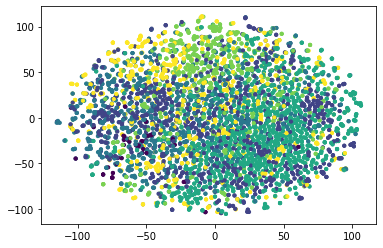

In [62]:
# plot the ground truth
plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=train_aug_labels, s=10)

In [63]:
print("-----after using sr-----")
for i in range(6):
  var = np.var(kmeans==i)
  print("clutser %s variance is : " %i,var)
  print("clutser %s amounts is : " %i,len(kmeans == i))

-----after using sr-----
clutser 0 variance is :  0.16949015669514314
clutser 0 amounts is :  6557
clutser 1 variance is :  0.1217165114338897
clutser 1 amounts is :  6557
clutser 2 variance is :  0.1489367101167414
clutser 2 amounts is :  6557
clutser 3 variance is :  0.14082906762716102
clutser 3 amounts is :  6557
clutser 4 variance is :  0.15268302511808035
clutser 4 amounts is :  6557
clutser 5 variance is :  0.09173994410275661
clutser 5 amounts is :  6557
